Practicing with old grad school data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

import janitor

pd.set_option('display.max_columns', 100)

In [5]:
df = pd.read_csv('OES_BG_CRM_080918_soil_fit_JAC_fit.csv', skiprows=2).clean_names()
df.head()

,label,type,date_time,element,element_label,flags,unadjusted_data,concentration,unit,intensity,concentration_sd,concentration_%rsd,intensity_sd,intensity_%rsd,weight,volume,dilution,internal_standard,replicates,concentration_replicate_1,concentration_replicate_2,concentration_replicate_3,concentration_replicate_4,concentration_replicate_5,concentration_replicate_6,intensity_replicate_1,intensity_replicate_2,intensity_replicate_3,intensity_replicate_4,intensity_replicate_5,intensity_replicate_6,flags_replicate_1,flags_replicate_2,flags_replicate_3,flags_replicate_4,flags_replicate_5,flags_replicate_6
0,Blank,BLK,8/9/2018 5:00:01 PM,Ar 420.067,Ar,NaN,0.00,0.00,ppm,2264687.81,-,-,20122.56,0.89,-,-,-,-,6,0.00,0.00,0.00,0.00,0.00,0.00,2296689.16,2256690.26,2248996.22,2246972.59,2282278.76,2256499.87,NaN,NaN,NaN,NaN,NaN,NaN
1,Blank,BLK,8/9/2018 5:00:01 PM,Ar 543.999,Ar,NaN,0.00,0.00,ppm,52225.75,-,-,190.90,0.37,-,-,-,-,6,0.00,0.00,0.00,0.00,0.00,0.00,52264.80,52183.09,52572.64,52059.57,52224.52,52049.89,NaN,NaN,NaN,NaN,NaN,NaN
2,Blank,BLK,8/9/2018 5:00:01 PM,Ar 641.631,Ar,NaN,0.00,0.00,ppm,1132177.19,-,-,5909.63,0.52,-,-,-,-,6,0.00,0.00,0.00,0.00,0.00,0.00,1127594.02,1125593.97,1131584.97,1132665.03,1133007.90,1142617.27,NaN,NaN,NaN,NaN,NaN,NaN
3,Blank,BLK,8/9/2018 5:00:01 PM,Ar 703.025,Ar,NaN,0.00,0.00,ppm,2368173.16,-,-,16631.80,0.70,-,-,-,-,6,0.00,0.00,0.00,0.00,0.00,0.00,2354435.32,2355474.12,2360686.50,2374843.01,2398550.70,2365049.30,NaN,NaN,NaN,NaN,NaN,NaN
4,Blank,BLK,8/9/2018 5:00:01 PM,Ar 737.212,Ar,NaN,0.00,0.00,ppm,3611368.34,-,-,45117.81,1.25,-,-,-,-,6,0.00,0.00,0.00,0.00,0.00,0.00,3673096.69,3634626.37,3641851.43,3586588.39,3575275.57,3556771.59,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.label.unique()

array(['Blank', 'Standard 1', 'Standard 2', 'Standard 3', 'Standard 4',
       'Standard 5', 'Standard 6', 'Standard 7', 'Standard 8', 'D_blk_1',
       'D_blk_2', 'D_blk_3', 'soil_dil5_1', 'soil_dil5_2', 'soil_dil5_3'],
      dtype=object)

In [7]:
df.element.unique()

array(['Ar 420.067', 'Ar 543.999', 'Ar 641.631', 'Ar 703.025',
       'Ar 737.212', 'C 175.122', 'C 193.027', 'C 247.856', 'Cd 214.439',
       'Co 238.892', 'Cr 267.716', 'H 434.047', 'H 486.133', 'N 174.213',
       'N 174.465', 'O 436.824', 'O 615.820', 'Pb 220.353', 'Ta 337.649',
       'Tb 308.958', 'Y 360.074', 'Y 371.029', 'Y 377.433'], dtype=object)

In [8]:
cal_curve_label = ['Blank', 'Standard 1', 'Standard 2', 'Standard 3', 'Standard 4',
       'Standard 5', 'Standard 6', 'Standard 7', 'Standard 8']

In [9]:
df_filt = (
    df.query('(label in @cal_curve_label)')
    .assign(concentration=lambda x: x['concentration'].astype(float))
)

df_filt

,label,type,date_time,element,element_label,flags,unadjusted_data,concentration,unit,intensity,concentration_sd,concentration_%rsd,intensity_sd,intensity_%rsd,weight,volume,dilution,internal_standard,replicates,concentration_replicate_1,concentration_replicate_2,concentration_replicate_3,concentration_replicate_4,concentration_replicate_5,concentration_replicate_6,intensity_replicate_1,intensity_replicate_2,intensity_replicate_3,intensity_replicate_4,intensity_replicate_5,intensity_replicate_6,flags_replicate_1,flags_replicate_2,flags_replicate_3,flags_replicate_4,flags_replicate_5,flags_replicate_6
0,Blank,BLK,8/9/2018 5:00:01 PM,Ar 420.067,Ar,NaN,0.00,0.0,ppm,2264687.81,-,-,20122.56,0.89,-,-,-,-,6,0.00,0.00,0.00,0.00,0.00,0.00,2296689.16,2256690.26,2248996.22,2246972.59,2282278.76,2256499.87,NaN,NaN,NaN,NaN,NaN,NaN
1,Blank,BLK,8/9/2018 5:00:01 PM,Ar 543.999,Ar,NaN,0.00,0.0,ppm,52225.75,-,-,190.90,0.37,-,-,-,-,6,0.00,0.00,0.00,0.00,0.00,0.00,52264.80,52183.09,52572.64,52059.57,52224.52,52049.89,NaN,NaN,NaN,NaN,NaN,NaN
2,Blank,BLK,8/9/2018 5:00:01 PM,Ar 641.631,Ar,NaN,0.00,0.0,ppm,1132177.19,-,-,5909.63,0.52,-,-,-,-,6,0.00,0.00,0.00,0.00,0.00,0.00,1127594.02,1125593.97,1131584.97,1132665.03,1133007.90,1142617.27,NaN,NaN,NaN,NaN,NaN,NaN
3,Blank,BLK,8/9/2018 5:00:01 PM,Ar 703.025,Ar,NaN,0.00,0.0,ppm,2368173.16,-,-,16631.80,0.70,-,-,-,-,6,0.00,0.00,0.00,0.00,0.00,0.00,2354435.32,2355474.12,2360686.50,2374843.01,2398550.70,2365049.30,NaN,NaN,NaN,NaN,NaN,NaN
4,Blank,BLK,8/9/2018 5:00:01 PM,Ar 737.212,Ar,NaN,0.00,0.0,ppm,3611368.34,-,-,45117.81,1.25,-,-,-,-,6,0.00,0.00,0.00,0.00,0.00,0.00,3673096.69,3634626.37,3641851.43,3586588.39,3575275.57,3556771.59,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Standard 8,STD,8/9/2018 5:13:25 PM,Ta 337.649,Ta,NaN,NaN,NaN,ppm,30.80,-,-,11.70,37.97,-,-,-,-,6,NaN,NaN,NaN,NaN,NaN,NaN,12.46,30.95,30.43,37.04,47.74,26.16,NaN,NaN,NaN,NaN,NaN,NaN
203,Standard 8,STD,8/9/2018 5:13:25 PM,Tb 308.958,Tb,NaN,NaN,NaN,ppm,18305.04,-,-,16.01,0.09,-,-,-,-,6,NaN,NaN,NaN,NaN,NaN,NaN,18331.66,18291.96,18317.31,18296.49,18292.61,18300.23,NaN,NaN,NaN,NaN,NaN,NaN
204,Standard 8,STD,8/9/2018 5:13:25 PM,Y 360.074,Y,NaN,NaN,NaN,ppm,40669.19,-,-,131.46,0.32,-,-,-,-,6,NaN,NaN,NaN,NaN,NaN,NaN,40574.29,40606.09,40594.71,40899.58,40756.24,40584.24,NaN,NaN,NaN,NaN,NaN,NaN
205,Standard 8,STD,8/9/2018 5:13:25 PM,Y 371.029,Y,NaN,NaN,NaN,ppm,40807.60,-,-,101.22,0.25,-,-,-,-,6,NaN,NaN,NaN,NaN,NaN,NaN,40710.29,40825.34,40660.83,40916.32,40890.51,40842.30,NaN,NaN,NaN,NaN,NaN,NaN


Below is code without weighting. What if we create a function that does weighting?

In [49]:
def plot_regression(df, x_col, y_col, element = '', xlabel=None, ylabel=None):
    # Extract data from DataFrame
    df = df.query('element == @element')
    x = df[x_col].values 
    y = df[y_col].values
    
    # Use column names as default labels if not provided
    xlabel = xlabel if xlabel is not None else x_col
    ylabel = ylabel if ylabel is not None else y_col
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Scatter plot
    ax.scatter(x, y, alpha=0.5, edgecolor='k', color = 'black')

    # Calculate regression line
    slope, intercept = np.polyfit(x, y, 1)
    y_pred = slope * x + intercept
    
    # Calculate R²
    r2 = r2_score(y, y_pred)

    # Sort x and corresponding y_pred for plotting
    sort_idx = np.argsort(x)
    x_sorted = x[sort_idx]
    y_pred_sorted = y_pred[sort_idx]
    
    # Plot regression line
    ax.plot(x_sorted, y_pred_sorted, 'r-', 
            label='y = {:.2f}x + {:.2f}\nR² = {:.2f}'.format(slope, intercept, r2))
    
    # Customize plot
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel + ' +/- 2*SD (cps)')
    ax.legend()
    plt.title(element)
    
    plt.tight_layout()
    plt.show()

    # Output regression error as a percentage of the measured value
    rse_out = []
    rse_conc_out = []
    for i in range(len(y)):
        if i == 0:
            continue
        rse = (y[i] - y_pred[i]) / y[i] * 100
        rse_conc = x[i]
        rse_conc_out.append(rse_conc)
        rse_out.append(rse)

    out = pd.DataFrame({'conc': rse_conc_out, 'rse': rse_out})
    return out, print('The average RSE (%) is {:.2f}'.format(np.average(rse_out)))

# Example usage:
# plot_regression(df, 'feature1', 'feature2')

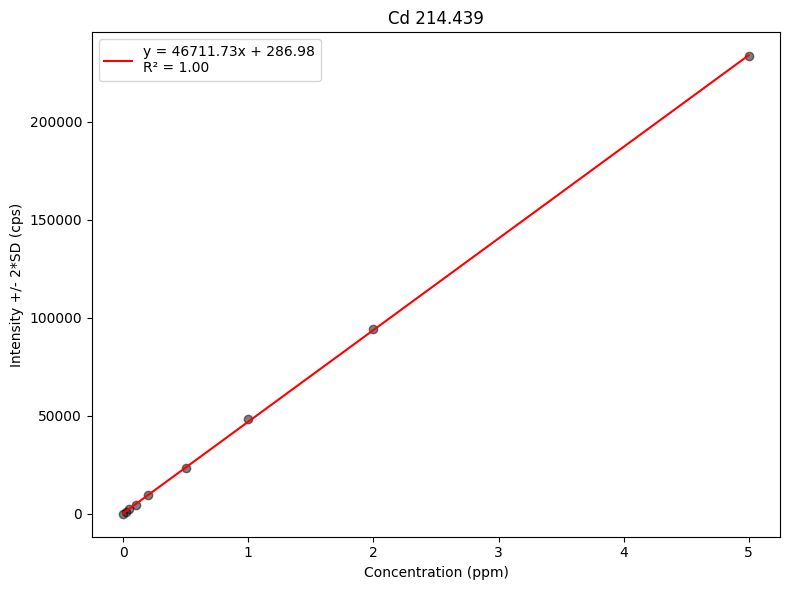

The average RSE (%) is -4.98


(   conc        rse
 0  0.02 -27.964617
 1  0.05 -10.422578
 2  0.10  -4.478786
 3  0.20   1.927583
 4  0.50  -1.439490
 5  1.00   2.332244
 6  2.00   0.350184
 7  5.00  -0.138064,
 None)

In [52]:
plot_regression(df_filt, 'concentration', 'intensity', 'Cd 214.439', 'Concentration (ppm)', 'Intensity')